<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/NLP_Module7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><u><h1>Assignment 7:- Long Short-Term Memory_LSTM</center></u></h1>

![](https://miro.medium.com/max/1400/1*mxjF7Rg40MX67mRAfkfMEw.jpeg)

LSTM[Long short term memory] is an improvement over Recurrent Neural Network to address RNN’s failure to learn in the presence of past observations greater than 5–10 discrete time steps between relevant input events and target signals (vanishing/exploding gradient issue). LSTM does so by introducing a memory unit called “cell state”.


![](https://miro.medium.com/max/1400/1*n-IgHZM5baBUjq0T7RYDBw.gif)

LSTM networks are an extension of recurrent neural networks mainly introduced to handle situations where RNNs fail. Talking about RNN, it is a network that works on the present input by taking into consideration the previous output and storing in its memory for a short period of time. Out of its various applications, the most popular ones are in the fields of speech processing, non-Markovian control, and music composition.
###Drawbacks to RNNs.
First, it fails to store information for a longer period of time. At times, a reference to certain information stored quite a long time ago is required to predict the current output. But RNNs are absolutely incapable of handling such “long-term dependencies”.
Second, there is no finer control over which part of the context needs to be carried forward and how much of the past needs to be ‘forgotten’.
Other issues with RNNs are exploding and vanishing gradients which occur during the training process of a network through backtracking.
<br>
<br>

Long Short-Term Memory (LSTM)was brought into the picture. It has been so designed that the vanishing gradient problem is almost completely removed, while the training model is left unaltered. Long time lags in certain problems are bridged using LSTMs where they also handle noise, distributed representations, and continuous values. With LSTMs, there is no need to keep a finite number of states from beforehand as required in the hidden Markov model. LSTMs provide us with a large range of parameters such as learning rates, and input and output biases. Hence, no need for fine adjustments. The complexity to update each weight is reduced to O(1) with LSTMs, similar to that of Back Propagation Through Time (BPTT), which is an advantage.

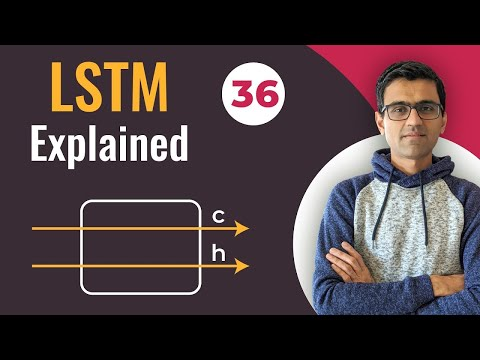

In [1]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('LfnrRPFhkuY', width=600, height=300)

####Exploding and Vanishing Gradients problems:

During the training process of a network, the main goal is to minimize loss observed in the output when training data is sent through it. We calculate the gradient, that is, loss with respect to a particular set of weights, adjust the weights accordingly and repeat this process until we get an optimal set of weights for which loss is minimum. This is the concept of backtracking.
<br>
Sometimes, it so happens that the gradient is almost negligible. It must be noted that the gradient of a layer depends on certain components in the successive layers. If some of these components are small (less than 1), the result obtained, which is the gradient, will be even smaller. This is known as the scaling effect. <br>
When this gradient is multiplied with the learning rate which is in itself a small value ranging between 0.1-0.001, it results in a smaller value. As a consequence, the alteration in weights is quite small, producing almost the same output as before. <br>
Similarly, if the gradients are quite large in value due to the large values of components, the weights get updated to a value beyond the optimal value. This is known as the problem of exploding gradients. To avoid this scaling effect, the neural network unit was re-built in such a way that the scaling factor was fixed to one. The cell was then enriched by several gating units and was called LSTM.

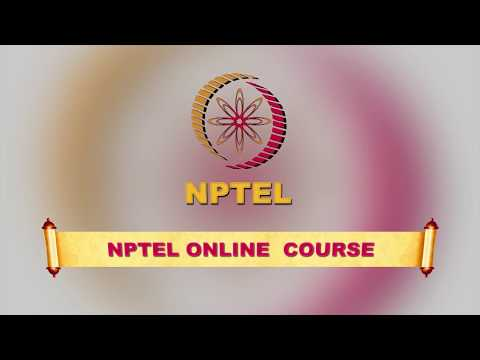

In [2]:
###Refer Video
YouTubeVideo('PMv8C-Ws1b8', width=600, height=300)

An LSTM has a similar control flow as a recurrent neural network. It processes data passing on information as it propagates forward. The differences are the operations within the LSTM’s cells.


![](https://miro.medium.com/max/700/1*0f8r3Vd-i4ueYND1CUrhMA.png)

Forget layer: This layer filters or removes info/memory from previous cell state based on current input and previous hidden state. This is done via a sigmoid activation function. This function results only 0 and 1 for inputs. Once it is multiplied to something either it will drop that(multiplication with zero) results in zero or completely pass through(anything multiplied by 1 is same)

![](https://miro.medium.com/max/700/1*GjehOa513_BgpDDP6Vkw2Q.gif)

Input Layer: This has again a forget logic, which removes any unwanted information from current input. We also have a modulator which keeps the values in between -1 and 1. This is achieved using a tanh activation function.

![](https://miro.medium.com/max/700/1*TTmYy7Sy8uUXxUXfzmoKbA.gif)

Cell State<br>
Now we should have enough information to calculate the cell state. First, the cell state gets pointwise multiplied by the forget vector. This has a possibility of dropping values in the cell state if it gets multiplied by values near 0. Then we take the output from the input gate and do a pointwise addition which updates the cell state to new values that the neural network finds relevant.
![](https://miro.medium.com/max/2400/1*S0rXIeO_VoUVOyrYHckUWg.gif)

Output Layer: <br>
This layer takes current input and current cell state and then outputs the hidden state and cell output. Again we use scaling (tanh) for cell state to keep values in range -1 to 1.

![](https://miro.medium.com/max/700/1*VOXRGhOShoWWks6ouoDN3Q.gif)

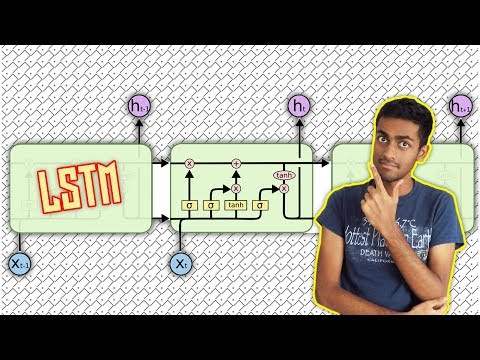

In [3]:
###Refer Video
YouTubeVideo('QciIcRxJvsM', width=600, height=300)

Let's begin by importing the required libraries.<br>
1. We’ll need TensorFlow so we import it as tf.<br>
2. From the TensorFlow Keras Datasets, we import the imdb one.<br>
3. We’ll need word embeddings i.e Embedding, Dense and LSTM layers.<br>
4. Our loss function will be binary cross entropy.<br>
5. As we’ll stack all layers on top of each other with model.add, we need Sequential for constructing our model.<br>
For optimization we use an extension of classic gradient descent called Adam.<br>
6. Finally, we need to import pad_sequences. We’re going to use the IMDB dataset which has sequences of reviews. While we’ll specify a maximum length, this can mean that shorter sequences are present as well; these are not cutoff and therefore have different sizes than our desired one (i.e. the maximum length).<br>
7. We’ll have to pad them with zeroes in order to make them of equal length.


In [26]:
#importing above mentioned libraries.
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam



The next step is specifying the model configuration.<br>
You can easily see how your model is configured, without having to take a look through all the aspects.<br>
We can see that our model will be trained with a batch size of 128, using binary crossentropy loss and Adam optimization, and only for five epochs (we only have to show you that it works).<br>
20% of our training data will be used for validation purposes, and the output will be verbose, with verbosity mode set to 1 out of 0, 1 and 2. Our learned word embedding will have 15 hidden dimensions and each sequence passed through the model is 300 characters at max. Our vocabulary will contain 5000 words at max.

In [5]:
# Model configuration of metrics is accuaracy
additional_metrics = ['accuracy']

#batch size is 128
batch_size = 128

#loss function is binary cross entropy
loss_function = BinaryCrossentropy()

#optimizer is adam
optimizer = Adam()

#embedding hidden dimensions=15[embedding_output_dims]
embedding_output_dims = 15

#max len of sentence is to be 300[max_sequence_length]
max_sequence_length = 300

#loss funciton is BinaryCrossentropy
loss_function = BinaryCrossentropy()

# Our vocabulary will contain 5000 words at max.[num_distinct_words]
num_distinct_words = 5000

#nos of epochs=5
epochs = 5


#Our vocabulary will contain 5000 words at max.[num_distinct_words]
num_distinct_words = 5000


#20% is used for validation split
validation_split = 0.2

# keep verbosity is 1
verbosity = 1


You might now also want to disable Eager Execution in TensorFlow. While it doesn’t work for all, some people report that the training process speeds up after using it. However, it’s not necessary to do so – simply test how it behaves on your machine

In [6]:
# Disable eager execution
tf.compat.v1.disable_eager_execution()

Loading and preparing the data:
we can load and prepare the data.<br>
Keras comes with a standard set of datasets, of which the IMDB dataset can be used for sentiment analysis.<br>
 we can use imdb.load_data(...)

In [7]:
# Load dataset by using (x_train, y_train), (x_test, y_test) for num_distinct_words i.e 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)

#shape of X train and X test
print(x_train.shape, x_test.shape)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(25000,) (25000,)


Once the data has been loaded, we apply pad_sequences. This ensures that sentences shorter than the maximum sentence length are brought to equal length by applying padding with, in this case, zeroes, because that often corresponds with the padding character.
Refer:https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences



In [27]:
# Pad all sequences with pad_sequence for x_train and x_test with max sequence length for value=0.0
# 0.0 because it corresponds with <PAD>
# 0.0 because it corresponds with <PAD>
padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length, value=0.0)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length, value=0.0)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_sequence_length, value=0.0) # Corrected line: Call pad_sequences for x_test as well

We can then define the Keras model.
we can initialize the model variable with Sequential().<br>
The first layer is an Embedding layer, which learns a word embedding that in our case has a dimensionality of 15. <br>
This is followed by an LSTM layer providing the recurrent segment, and a Dense layer that has one output through Sigmoid a number between 0 and 1.

In [10]:
# Define the Keras model
#intialize with sequential()
model = Sequential()

#intialize first layer for embedding with num_distinct_words, embedding_output_dims and max sequence length
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))

#intialize another layer with LSTM for 10
model.add(Embedding(num_distinct_words,embedding_output_dims,input_length=max_sequence_length))

#intialize another layer with LSTM for 10
model.add(Dense(1,activation='sigmoid'))

#adding dense layer with 1 output and having activation function of sigmoid
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


The model can then be compiled. We do so by specifying the optimizer, the loss function, and the  metrics that we had specified before.

In [11]:
# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)


This is also a good place to generate a summary of what the model looks like.

In [12]:
# Give a summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training the Keras model,we can instruct TensorFlow to start the training process.

In [33]:
# Train the model for padded inputs, y train, batch size , epochs ,verbose and validation spilt.
history=model.fit(padded_inputs,y_train, batch_size=batch_size,epochs=5, verbose=1, validation_split=0.2)


The (input, output) pairs passed to the model are the padded inputs and their corresponding class labels. Training happens with the batch size, number of epochs, verbosity mode and validation split that were also defined in the configuration section above.

Evaluating the Keras model
We cannot evaluate the model on the same dataset that was used for training it. We fortunately have testing data available through the train/test split performed in the load_data(...) section, and can use built-in evaluation facilities to evaluate the model. We then print the test results on screen. Evaluate the model using the evaluate method by passing the independent test data and dependent test data.

In [32]:
# Test the model after training
results = model.evaluate(x_test, y_test)


Now print the Test results i.e. the loss and accuracy.

In [ ]:
# print the loss and accuracy
print("Test results - Loss: {:.5f}. Accuracy: {:.2f}%".format(results[0], results[1]*100))


Test results - Loss: 0.34331050999641416 - Accuracy: 85.90400218963623%


![](https://listimg.pinclipart.com/picdir/s/142-1420937_hurrah-clipart-clipground-free-birthday-clip-art-hooray.png)

That's cool, 86% is the accuracy of our model. We have come to an end of this project but don't stop here, try as many projects of the similar type to get a better understanding of the use cases. Solve the practice sheet of this project to test yourself.!!


Great job!! You have come to the end of this assignment. Treat yourself for this :))
<br>
# Do fill this [feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s)
<br>
You may head on to the next assignment.